# Разработка модели предсказания болезней сердца

Целью настоящего проекта провести анализ представленных данных, о пациентах, у которых есть или нет сердечных заболеваний и на основании информации по кажлдому конкретному пациенту разработать модель машинного обучения для возможности предсказывать наличие болезней сердца по аналогичным данным.

Работать будем с датасетом из 16 признаков:
* `id` - уникальный номер пациента;
* `age` - возраст пациента;
* `sex` - пол пациента;
* `datasets` - место сбора данных;
* `cp` - тип боли в груди;
 * `typical angina` - типичная стенокардия;
 * `atypical angina` - атипичная стенокардия;
 * `non-anginal` - не является стенокардией;
 * `asymptomatic` - безсимптномный;
* `trestbps` - кровяное давление в состоянии покоя, мм рт. ст.;
* `chol` - количиство холестирина, мг/дл;
* `fbs` - уровень сахара в крови:
 * True, если уровень > 120 мг/дл;
 * False иначе;
* `restecg` - результаты электрокардиограммы в состоянии покоя:
 * `normal` - в норме;
 * `stt abnormality` - есть аномалия;
 * `lv hypertrophy` - гпертрофия левого желудочка;
* `thalch` - максимальная частота сердечных сокращений;
* `exang` - стенокардия, вызванная физической нагрузкой (True/False);
* `oldpeak`- Уменьшение ST, вызванное физической нагрузкой, по сравнению с состоянием покоя;
* `slope` - наклон пикового сегмента ST при нагрузке;
* `ca` - количество крупных сосудов (0-3), окрашенных при рентгеноскопии;
* `thal` - талласемия:
 * `normal` - в норме;
 * `fixed defect` - фиксированный дефект;
 * `fixed defect` - обратимый дефект;
* `num` - целевой признак:
 * `0` - сердечная болезнь отсутствует;
 * `1, 2, 3, 4` - стадии сердечной болезни.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [2]:
try:
    data = pd.read_csv('C://Users//User//Desktop//Яндекс Практикум//DataScience//12. Мастерская_1//heart_disease_uci.csv')
except:
    data = pd.read_csv('C://Users//asus//Desktop//Яндекс Практикум//DataScience//14 Мастерская_1//heart_disease_uci.csv')

## 1. Исследовательский анализ данных

Изучим данные:

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Колонкa `id` нам не нужна - она не несет в себе никакой полезной информации. Удалим ее:

In [5]:
data = data.drop('id', axis = 1)

Распределение количественных признаков:

In [6]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


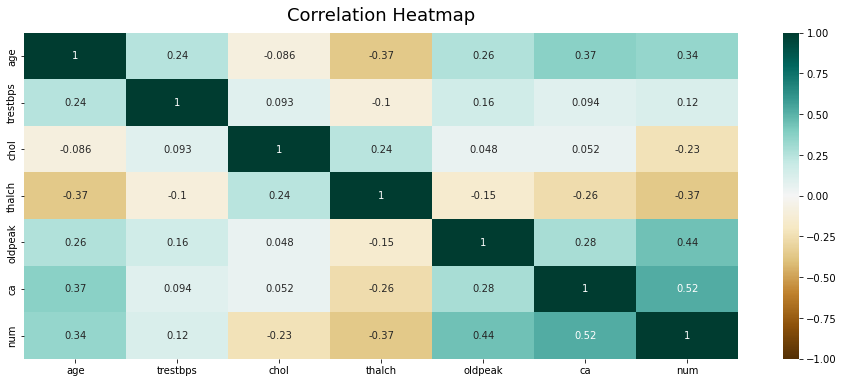

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 


Посмотрим зависимости припомощи диаграмм рассеивания:

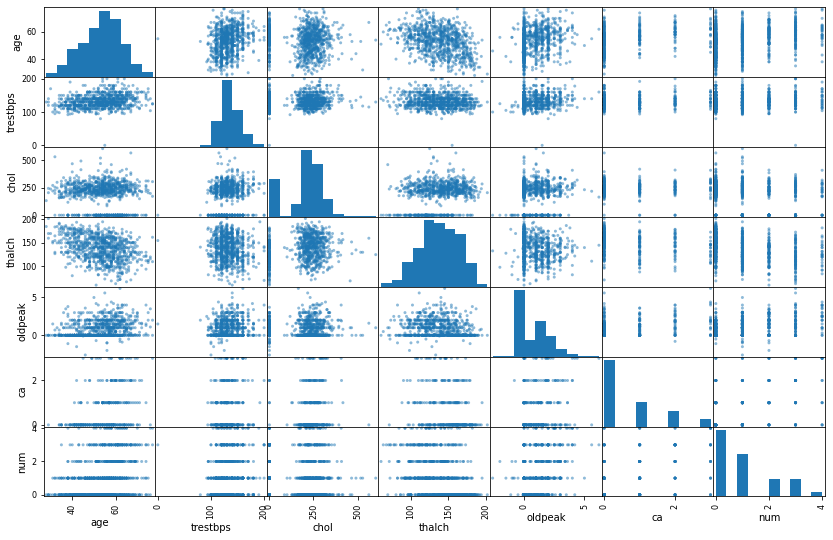

In [8]:
pd.plotting.scatter_matrix(data, figsize=(14, 9));

Прямых зависимостей не выявлено

Изучим распределение категориальных признаков:

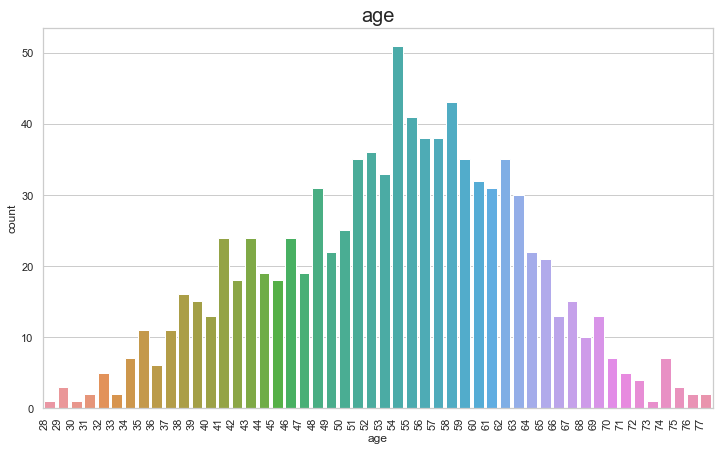

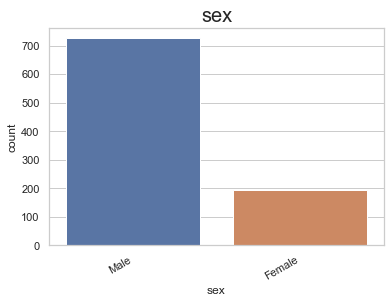

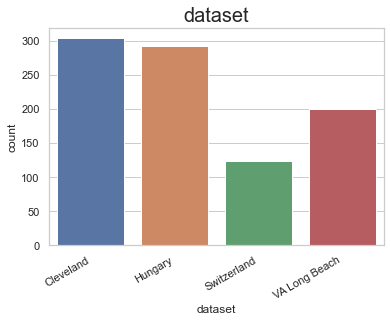

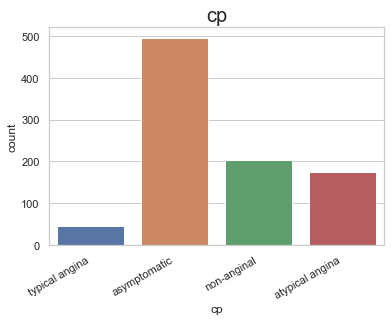

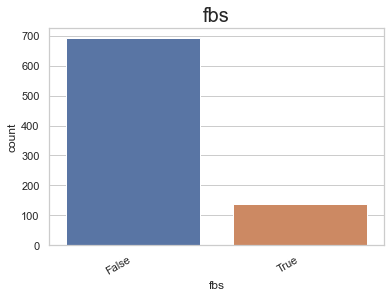

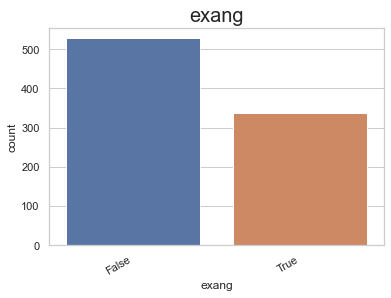

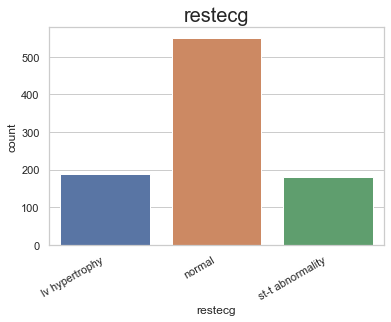

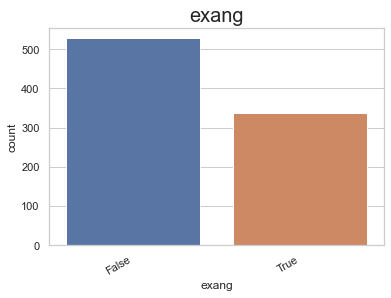

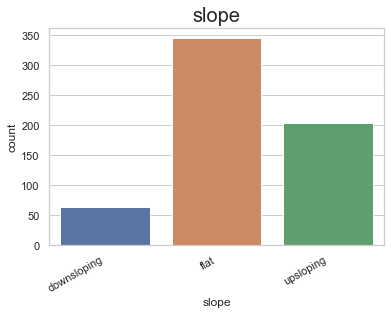

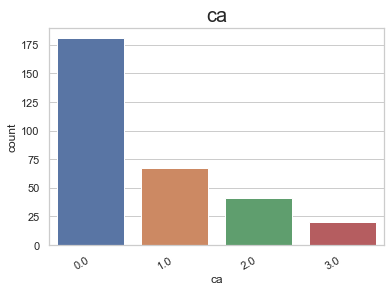

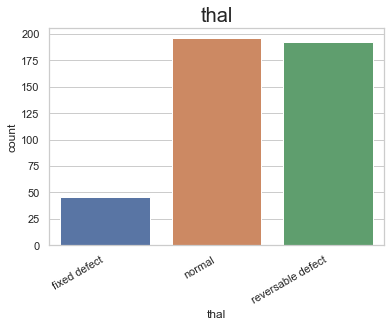

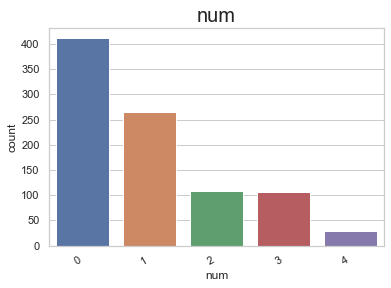

In [9]:
for column in data[['age', 'sex', 'dataset', 'cp', 'fbs', 'exang',
                   'restecg', 'exang', 'slope', 'ca', 'thal', 'num']]:
    if column == 'age':
        sns.set_theme(style='whitegrid')
        plt.figure(figsize=(12,7))
        ax = sns.countplot(x=data[column])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
        plt.title(column, fontsize=20)
        plt.show()
    else:
        sns.set_theme(style='whitegrid')
        ax = sns.countplot(x=data[column])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
        plt.title(column, fontsize=20)
        plt.show()

Изучим количественные признаки:

Зависимсоть уровня холестирина, максимальной частоты сердечных сокращений и артериального давления от возраста. Так же посмотрим как распределяются стадии болезни сердца.

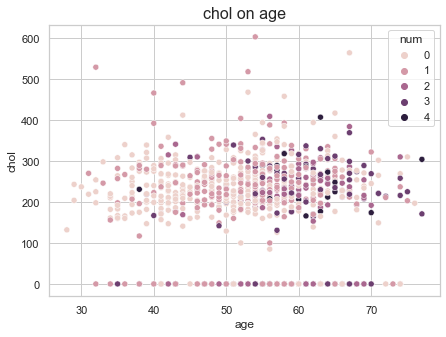

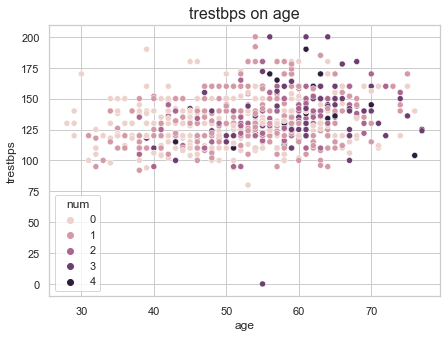

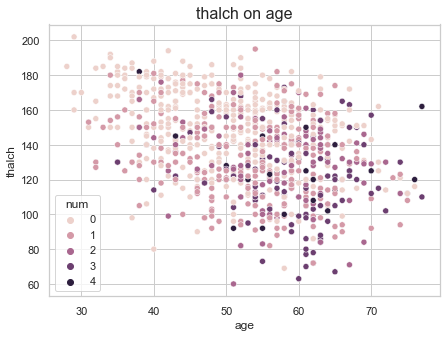

In [10]:
for column in ['chol', 'trestbps', 'thalch']:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data = data, x='age', y=column, hue = 'num');
    plt.title(f'{column} on age', fontsize=16)
    plt.show()



Так же посмотрим распределение данных на диаграмме размаха:

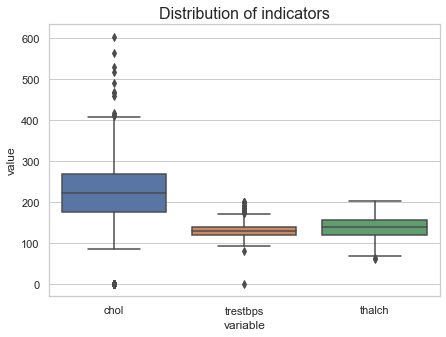

In [11]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='variable', y='value', data=pd.melt(data[['chol', 'trestbps', 'thalch']]));
plt.title('Distribution of indicators', fontsize=16);

Гистограммы количественных признаков:

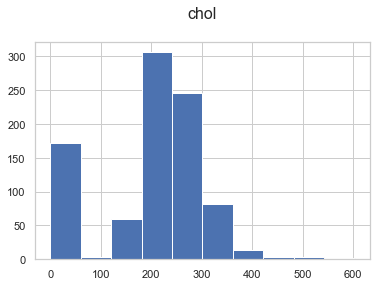

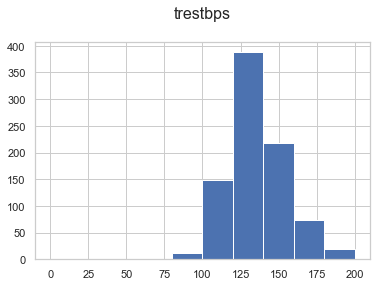

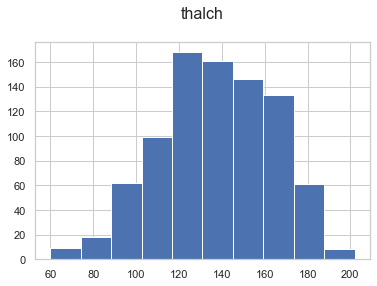

In [12]:
for column in data[['chol', 'trestbps', 'thalch']]:
    data[column].hist()
    plt.title(column + '\n', fontsize=16)
    plt.show()

Зависимость стадий заболевания от средних показателей:

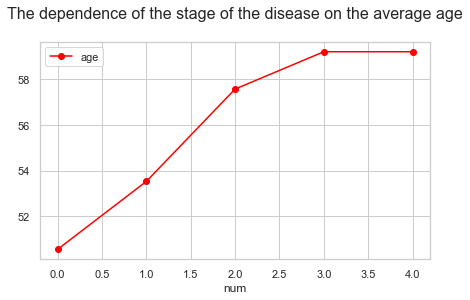

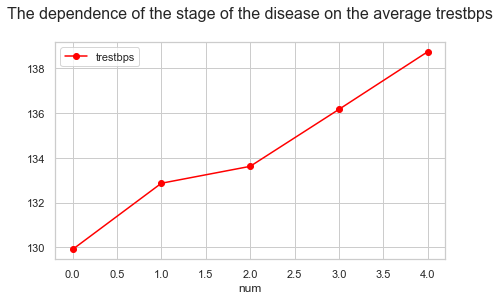

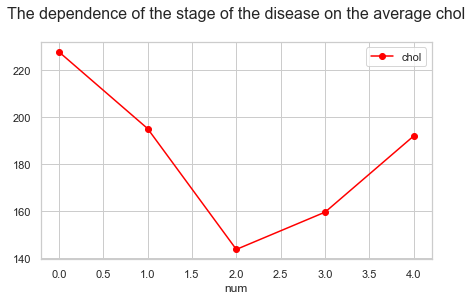

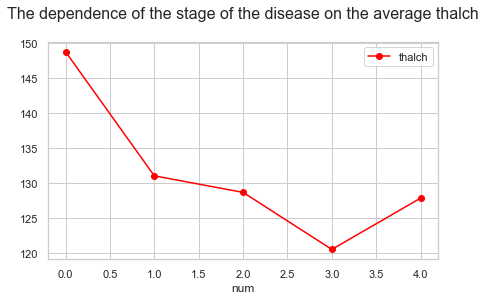

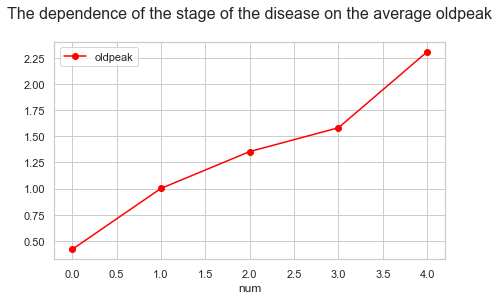

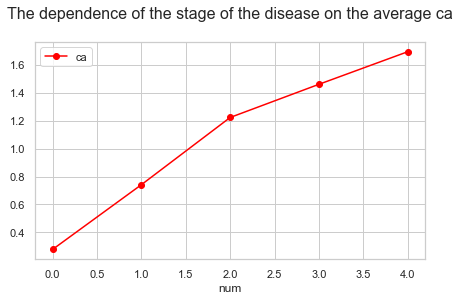

In [13]:
for column in data.groupby('num').mean().columns:     
    data.pivot_table(
        index='num', values=column, aggfunc='mean'
    ).plot(kind='line', figsize=(7,4),  style = 'o-', color='red')
    plt.title(f'The dependence of the stage of the disease on the average {column}' + '\n', fontsize=16);

### Вывод:

В результате проведенного анализа выяснили:
* Есть пропущенные значени признаков, которые можно заменить на среднее или медиану. Метод describe показал;
* Есть значения уровня холестирина и артериального давления равные нулю, что так же необходимо поправить;
* Данные колонок с уникальным номером, а так же с местом сбора данных не информативны для построения модели - их можно удалить;
* Выявлена некоторая зависимость стадии заболевания от возраста, артериального давления.

## 2. Предобработка данных

### 2.1 Подготовка данных

Удалим информацию с местом сбора данных:

In [14]:
data.drop('dataset', axis=1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


Заменим пропуски. Для категориальных признаков на наиболее часто встречающееся значение. Для количественных признаков - на медиану.

In [16]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [17]:
quantitative = ['trestbps', 'chol', 'thalch', 'oldpeak']
categorical = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [18]:
data_clean = data.copy()
for i in quantitative:
    data_clean[i] = data[i].fillna(data[i].median())
for i in categorical:
    data_clean[i] = data[i].fillna(data[i].value_counts().index[0])

Проверка на дубликаты:

In [19]:
data_clean.duplicated().sum()

2

Удаление дублей:

In [20]:
data_clean.drop_duplicates(inplace=True)

В данной задаче необходимо предсказать есть ли у пациента сердечное заболевание или нет. В целевом признаке имеем 5 классов 0 - не болен и 1,2,3,4 - стадии заболевания. Важно определить есть ли заболевание, а стадию определит дальнейшее обследование. Поэтому заменим классы 1,2,3,4 на 1:

In [21]:
# функция, применимая к целевому столбцу
def replacement (value):
    if value != 0:
        return 1
    else:
        return value

In [22]:
data_clean['num'] = data_clean['num'].apply(replacement)

Некоторые признаки имеют тип данных object - для моделей классификации они не понятны поэтому приведем классы в 0 и 1 техникой OneHotEncoder:

In [23]:
data_processed = pd.get_dummies(data_clean, drop_first=True)

In [24]:
data_processed.shape

(918, 19)

Разделим датасет на признаки и таргет:

In [25]:
features = data_processed.drop('num', axis=1)
target = data_processed['num']

Для проверки качества модели выделим тестовую выборку в соотношении 75/25:

In [26]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42, stratify=target)

### 2.2 Стандартизация данных

Данные привели в цифрам и классам 0 и 1, но есть так же и количесвенные признаки, которые по значению выше, чем 0 и 1 и следовательно наша модель будет опреелять как более важный признак тот,у которого значение выше, что не правильно. Что бы недопустить данную ошибку стандартизируем данные относительно 0 и 1:

In [27]:
numeric = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [28]:
pd.options.mode.chained_assignment = None
                              
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверка баланса классов:

1    0.553779
0    0.446221
Name: num, dtype: float64


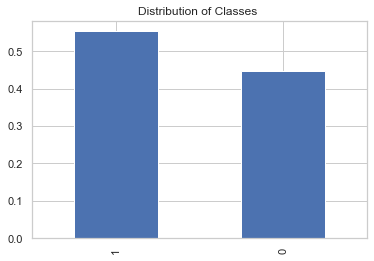

In [29]:
print(target_train.value_counts(normalize=True))
target_train.value_counts(normalize=True).plot(kind='bar', grid=True, title='Distribution of Classes ');

Классы почти сбалансированы.

## 3. Обучение моделей, выбор модели и проверка качества

### 3.1 Обучение моделей и подбор гиперпараметров

Обучим и подберем гиперпараметры для трех моделей: `Дерево решений`, `Случайный лес` и `Логистическую регрессию`. Подбор гиперпараметров будем осуществлять с помощью `GridSearchCV`. В качестве метрики используем ROC_AUC:

In [30]:
#Функция, которая принимает на вход список гиперпараметров, 
# модель, метрику и количество выборок для кросс-валидации,
# а возвращает полученные параметры в ходе перебора
def grid (model, param_grid, scoring, cv):
    grid = GridSearchCV(
        model, param_grid, scoring=scoring, cv=cv, n_jobs=-1
    ).fit(features_train, target_train)
    grid_results = pd.DataFrame(grid.cv_results_)
    print('Наилучшее значение ROC_AUC:')
    print(grid.best_score_)
    print('Достигается при гиперпараметрах:')
    print(grid.best_params_)
    return [grid, grid_results]


#### 3.1.1 Дерево решений

In [31]:
%%time
model_DTC_1 = DecisionTreeClassifier(random_state=42)
param_grid_DTC_1 = {'max_features': range(1,16,1),
                        'max_depth': range(1,16,1)}
grid_list_DTC_1 = grid(model_DTC_1, param_grid_DTC_1, 'roc_auc', 10)

Наилучшее значение ROC_AUC:
0.8330154325018502
Достигается при гиперпараметрах:
{'max_depth': 4, 'max_features': 8}
Wall time: 13.6 s


График распределения метрики в зависимости от гиперпараметров:

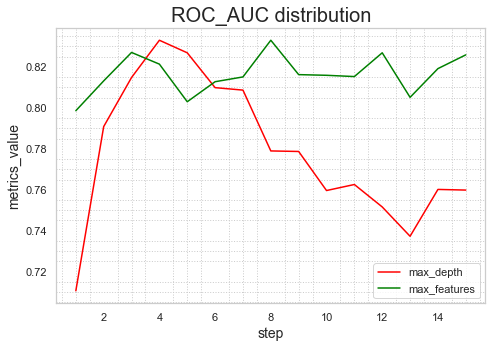

In [32]:
x_1 = grid_list_DTC_1[1].groupby('param_max_depth')['mean_test_score'].max().index
y_1 = grid_list_DTC_1[1].groupby('param_max_depth')['mean_test_score'].max()
x_2 = grid_list_DTC_1[1].groupby('param_max_features')['mean_test_score'].max().index
y_2 = grid_list_DTC_1[1].groupby('param_max_features')['mean_test_score'].max()
plt.figure(figsize=(7, 5))
plt.plot(x_1, y_1, color='red', label='max_depth')
plt.plot(x_2, y_2, color='green', label='max_features')
plt.xlabel('step', fontsize=14)
plt.ylabel('metrics_value', fontsize=14)
plt.title('ROC_AUC distribution', fontsize=20)
plt.legend()
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.show()

Запишем модель с наилучшими гиперпараметрами в переменную:

In [33]:
best_DTC_1 = DecisionTreeClassifier(
    max_depth=grid_list_DTC_1[0].best_params_['max_depth'], 
    max_features=grid_list_DTC_1[0].best_params_['max_features'],
    random_state=42
)

Проверим модель дерева решений со сбалансированными классами:

In [34]:
%%time
model_DTC_2 = DecisionTreeClassifier(random_state=42, class_weight='balanced')
param_grid_DTC_2 = {'max_features': range(1,16,1),
                        'max_depth': range(1,16,1)}
grid_list_DTC_2 = grid(model_DTC_2, param_grid_DTC_2, 'roc_auc', 10)

Наилучшее значение ROC_AUC:
0.8289685182766677
Достигается при гиперпараметрах:
{'max_depth': 4, 'max_features': 8}
Wall time: 9.06 s


График:

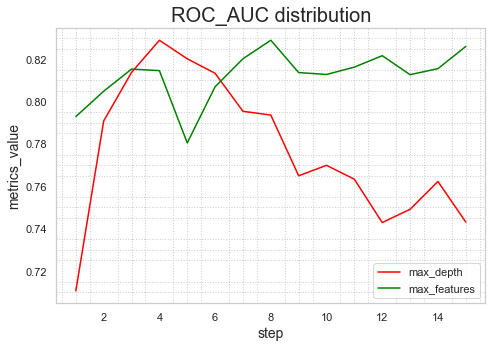

In [35]:
x_1 = grid_list_DTC_2[1].groupby('param_max_depth')['mean_test_score'].max().index
y_1 = grid_list_DTC_2[1].groupby('param_max_depth')['mean_test_score'].max()
x_2 = grid_list_DTC_2[1].groupby('param_max_features')['mean_test_score'].max().index
y_2 = grid_list_DTC_2[1].groupby('param_max_features')['mean_test_score'].max()
plt.figure(figsize=(7, 5))
plt.plot(x_1, y_1, color='red', label='max_depth')
plt.plot(x_2, y_2, color='green', label='max_features')
plt.xlabel('step', fontsize=14)
plt.ylabel('metrics_value', fontsize=14)
plt.title('ROC_AUC distribution', fontsize=20)
plt.legend()
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.show()

In [36]:
best_DTC_2 = DecisionTreeClassifier(
    max_depth=grid_list_DTC_2[0].best_params_['max_depth'], 
    max_features=grid_list_DTC_2[0].best_params_['max_features'],
    random_state=42, class_weight='balanced'
)

#### 3.1.2 Случайный лес

In [37]:
%%time
# обучим модель случайного леса и подберем гиперпараметры
model_RFC_1 = RandomForestClassifier(random_state=42)
param_grid_RFC_1 = {'n_estimators': range(10,201,30),
                    'max_depth': range(10,21,1)
                   }
grid_list_RFC_1 = grid(model_RFC_1, param_grid_RFC_1, 'roc_auc', 10)


Наилучшее значение ROC_AUC:
0.8829673283705542
Достигается при гиперпараметрах:
{'max_depth': 16, 'n_estimators': 160}
Wall time: 1min 46s


График распределения метрики в зависимости от гиперпараметров:

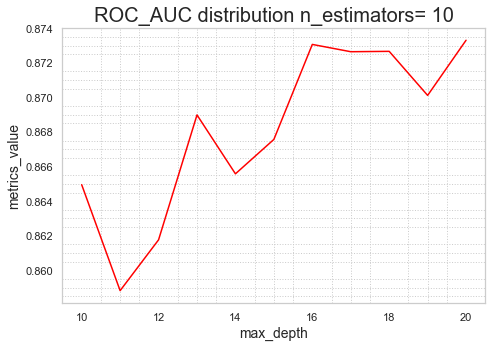

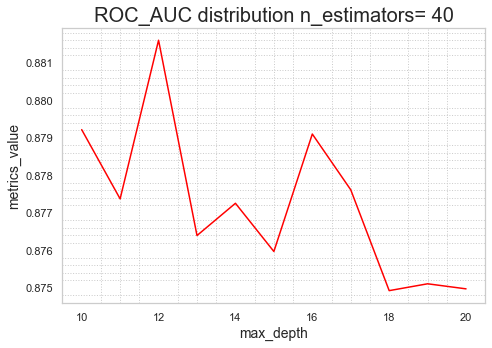

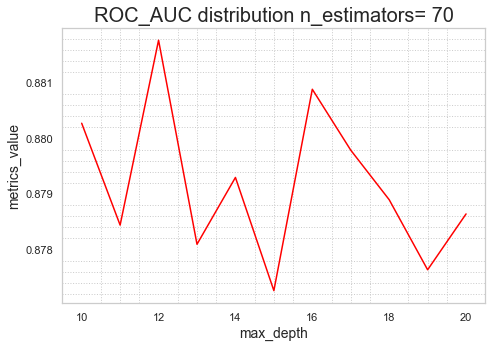

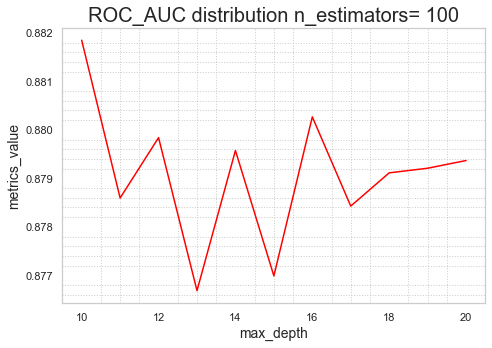

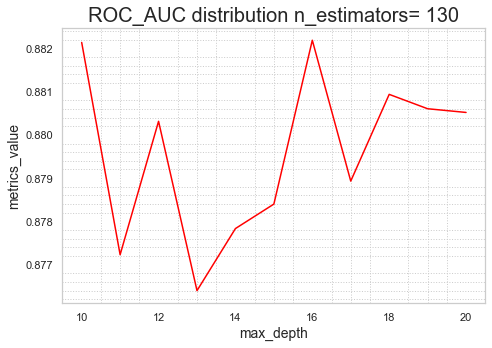

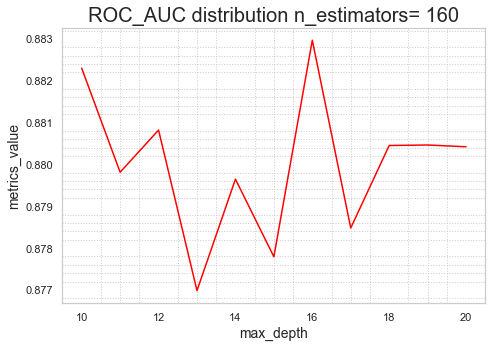

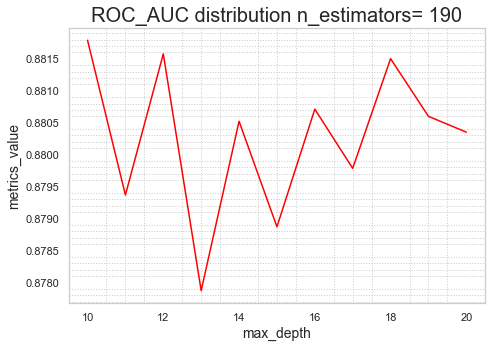

In [38]:
for i in grid_list_RFC_1[1]['param_n_estimators'].unique():
    x=grid_list_RFC_1[1][grid_list_RFC_1[1]['param_n_estimators'] == i]['param_max_depth']
    y=grid_list_RFC_1[1][grid_list_RFC_1[1]['param_n_estimators'] == i]['mean_test_score']
    plt.figure(figsize=(7, 5))
    plt.plot(x, y, color='red', label='ROC_AUC')
    plt.xlabel('max_depth', fontsize=14)
    plt.ylabel('metrics_value', fontsize=14)
    plt.title('ROC_AUC distribution n_estimators= '+str(i), fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()

    plt.show()

Запишем лучшую модель:

In [39]:
best_RFC_1 = RandomForestClassifier(
    n_estimators=grid_list_RFC_1[0].best_params_['n_estimators'],
    max_depth=grid_list_RFC_1[0].best_params_['max_depth'], random_state=42
)

Исследуем аналогичную модель, но с балансом классов:

In [40]:
%%time
# обучим модель случайного леса и подберем гиперпараметры
model_RFC_2 = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid_RFC_2 = {'n_estimators': range(10,201,30),
                    'max_depth': range(10,21,1)
                   }
grid_list_RFC_2 = grid(model_RFC_2, param_grid_RFC_2, 'roc_auc', 10)


Наилучшее значение ROC_AUC:
0.8798812996096528
Достигается при гиперпараметрах:
{'max_depth': 12, 'n_estimators': 70}
Wall time: 1min 40s


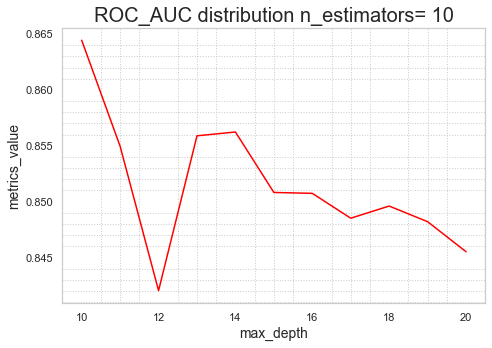

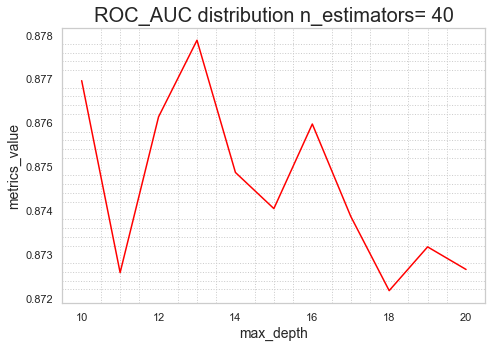

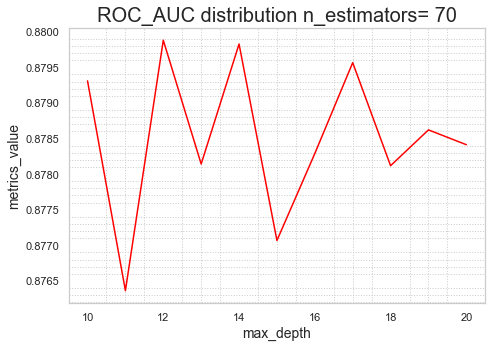

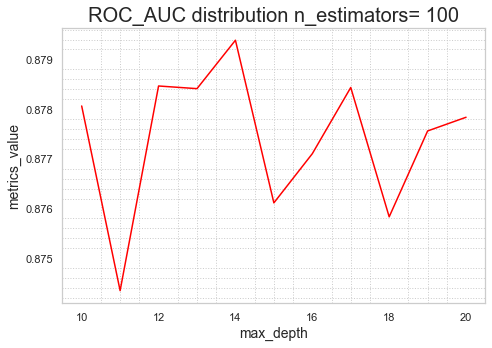

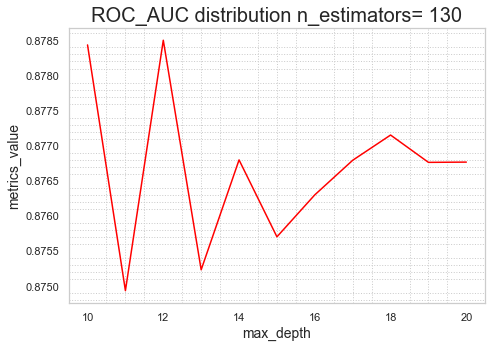

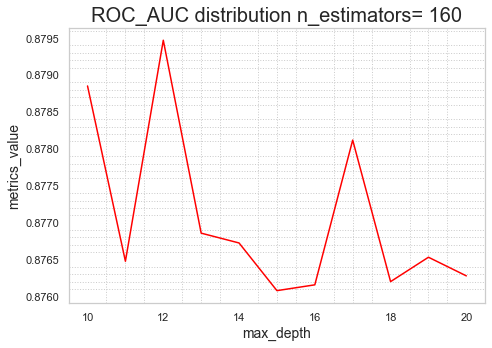

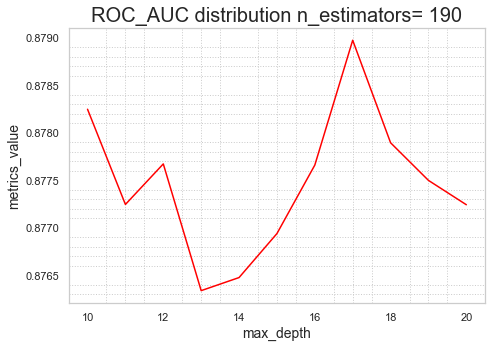

In [41]:
for i in grid_list_RFC_2[1]['param_n_estimators'].unique():
    x=grid_list_RFC_2[1][grid_list_RFC_2[1]['param_n_estimators'] == i]['param_max_depth']
    y=grid_list_RFC_2[1][grid_list_RFC_2[1]['param_n_estimators'] == i]['mean_test_score']
    plt.figure(figsize=(7, 5))
    plt.plot(x, y, color='red', label='ROC_AUC')
    plt.xlabel('max_depth', fontsize=14)
    plt.ylabel('metrics_value', fontsize=14)
    plt.title('ROC_AUC distribution n_estimators= '+str(i), fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()

    plt.show()

In [42]:
best_RFC_2 = RandomForestClassifier(
    n_estimators=grid_list_RFC_2[0].best_params_['n_estimators'],
    max_depth=grid_list_RFC_2[0].best_params_['max_depth'], random_state=42, class_weight='balanced'
)

#### 3.1.3 Логистическая регрессия

In [43]:
%%time
# обучим модель логистической регресии и подберем гиперпараметры
model_LR_1 = LogisticRegression(random_state=42)
param_grid_LR_1 = {'C': range(1,16),
                 'max_iter': range(250,501,50)}
grid_list_LR_1 = grid(model_LR_1, param_grid_LR_1, 'roc_auc', 10)

Наилучшее значение ROC_AUC:
0.8749425362413478
Достигается при гиперпараметрах:
{'C': 1, 'max_iter': 250}
Wall time: 10.8 s


График распределения метрики в зависимости от гиперпараметров:

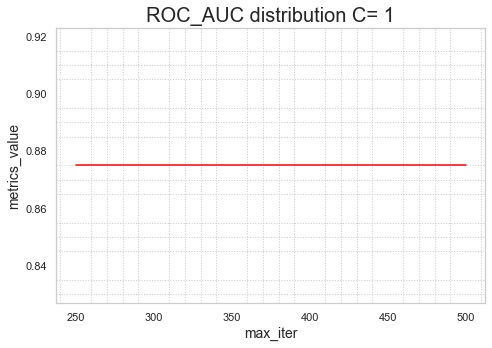

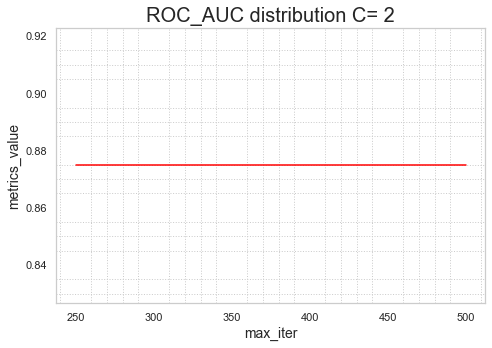

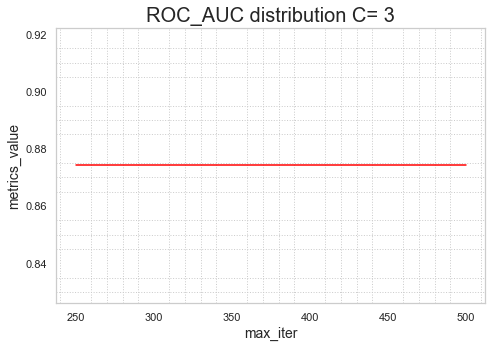

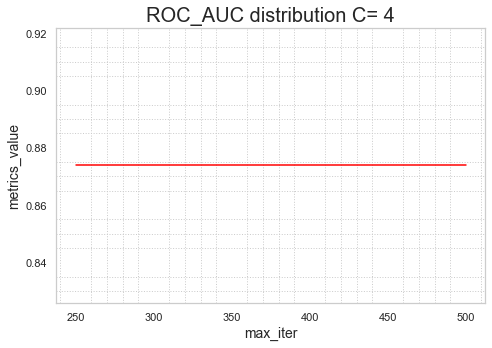

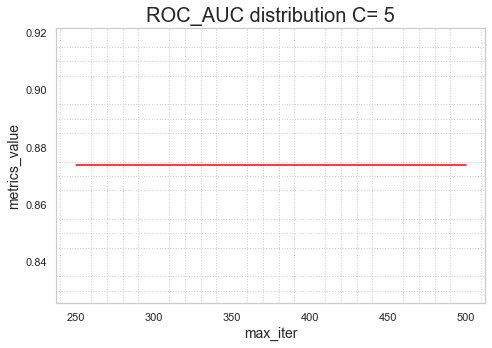

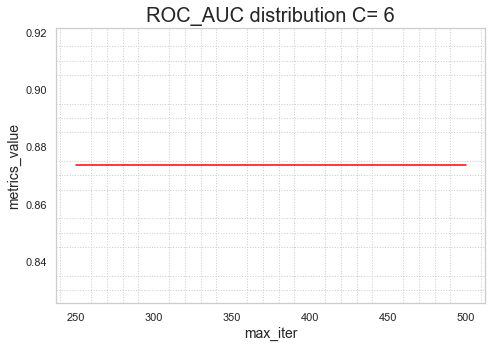

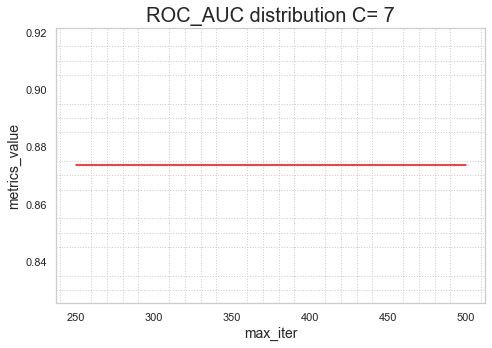

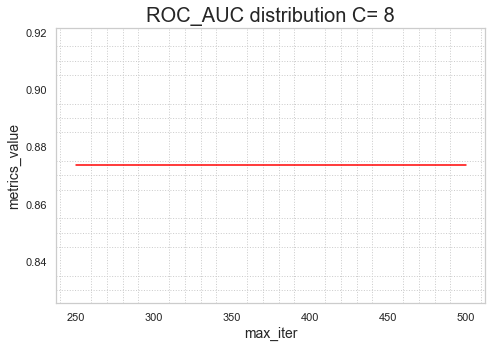

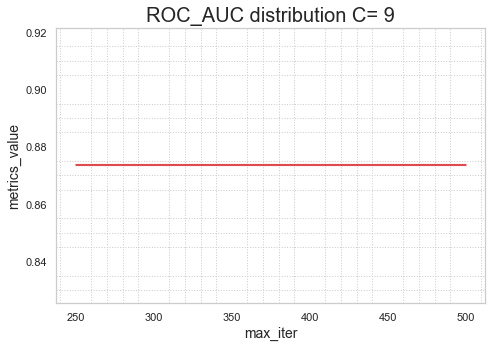

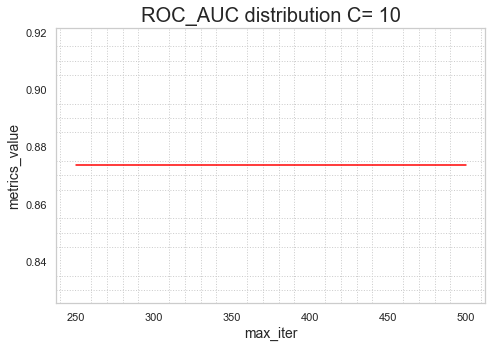

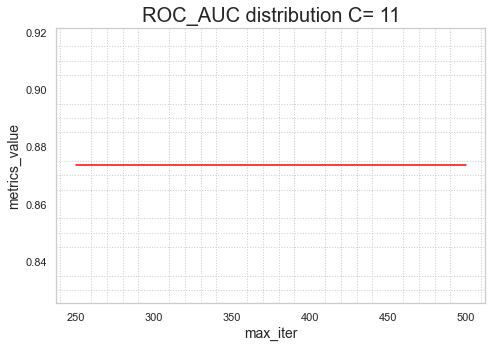

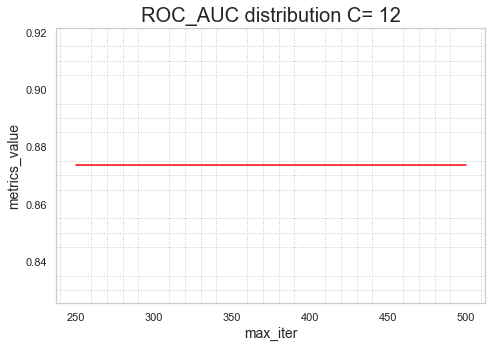

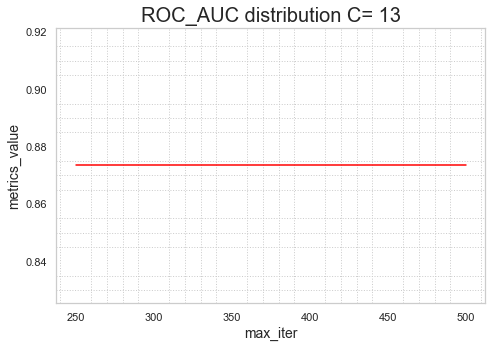

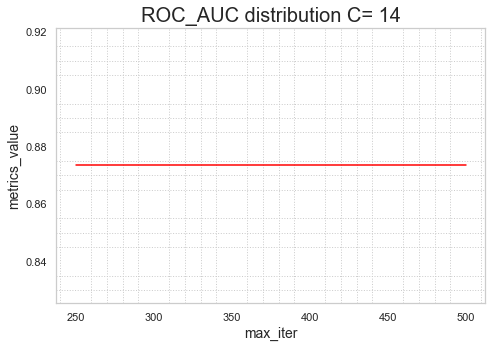

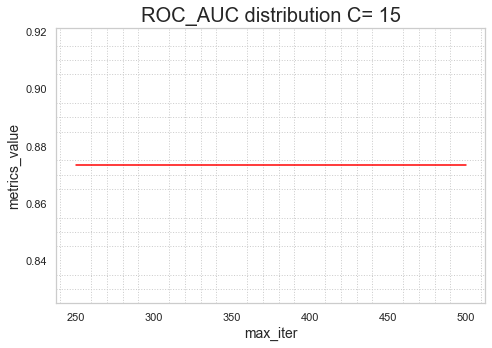

In [44]:
for i in grid_list_LR_1[1]['param_C'].unique():
    x=grid_list_LR_1[1][grid_list_LR_1[1]['param_C'] == i]['param_max_iter']
    y=grid_list_LR_1[1][grid_list_LR_1[1]['param_C'] == i]['mean_test_score']
    plt.figure(figsize=(7, 5))
    plt.plot(x, y, color='red', label='ROC_AUC')
    plt.xlabel('max_iter', fontsize=14)
    plt.ylabel('metrics_value', fontsize=14)
    plt.title('ROC_AUC distribution C= '+str(i), fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()

    plt.show()

Запишем лучшую модель:

In [45]:
best_LR_1 = LogisticRegression(
    C=grid_list_LR_1[0].best_params_['C'],
    random_state=42, max_iter=250
)

И с балансом классов:

In [46]:
%%time
# обучим модель логистической регресии и подберем гиперпараметры
model_LR_2 = LogisticRegression(random_state=42, class_weight='balanced')
param_grid_LR_2 = {'C': range(1,16),
                 'max_iter': range(250,501,50)}
grid_list_LR_2 = grid(model_LR_2, param_grid_LR_2, 'roc_auc', 10)

Наилучшее значение ROC_AUC:
0.8753590759363256
Достигается при гиперпараметрах:
{'C': 2, 'max_iter': 250}
Wall time: 11.9 s


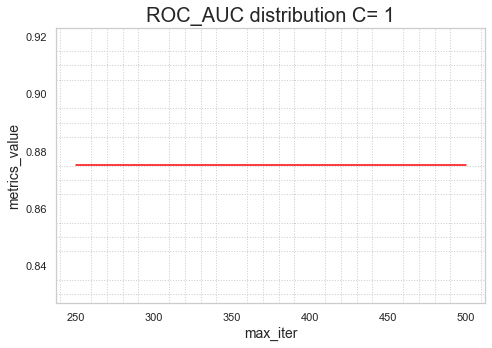

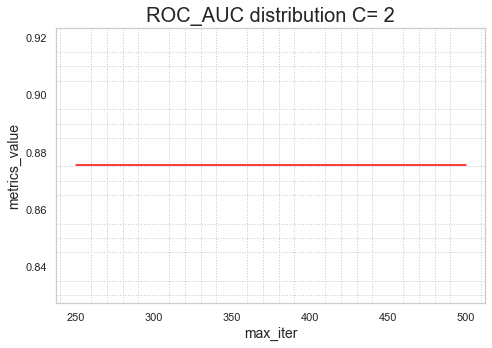

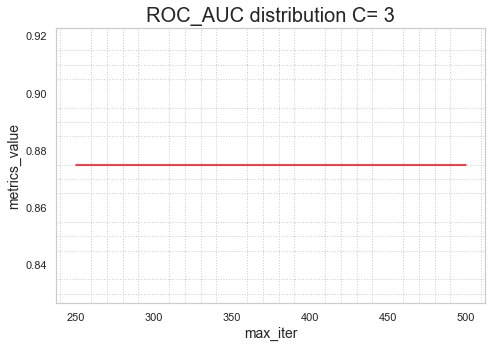

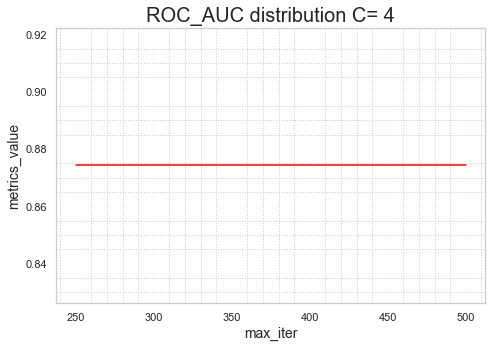

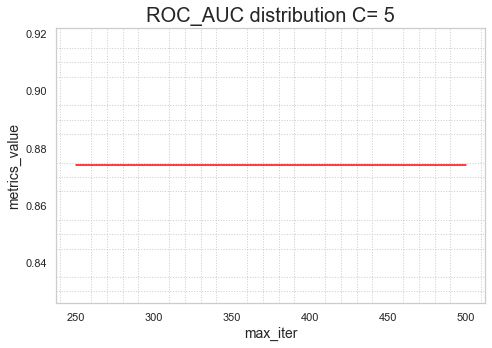

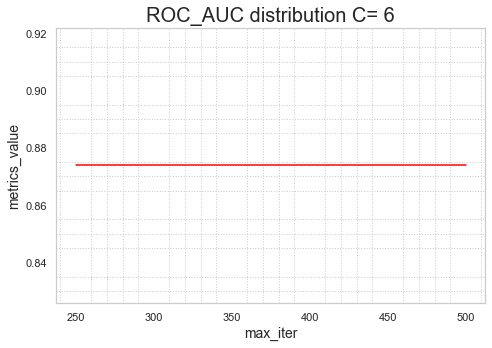

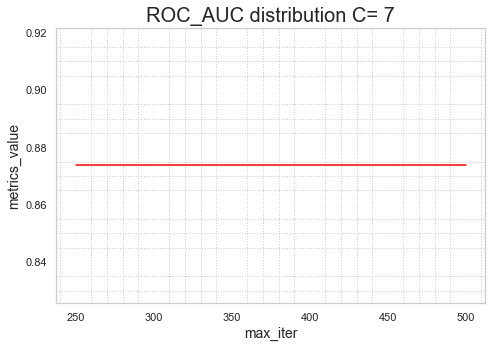

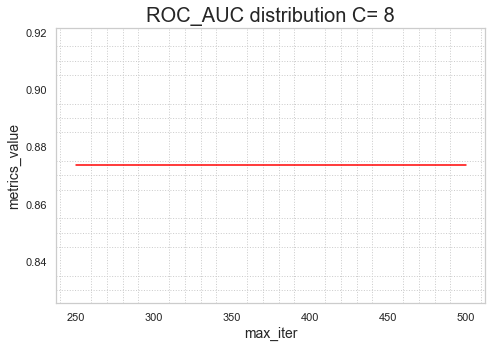

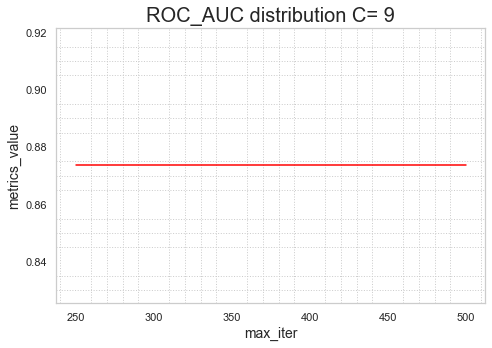

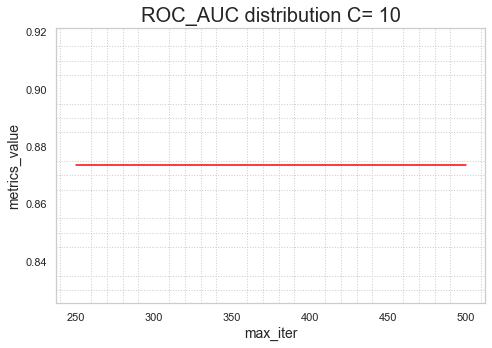

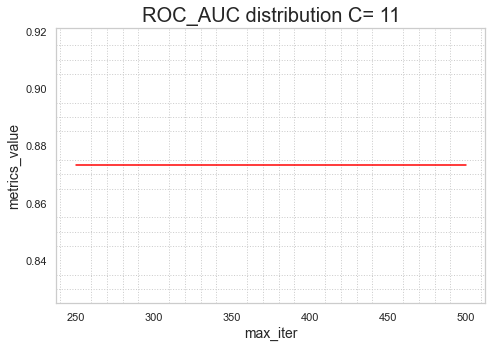

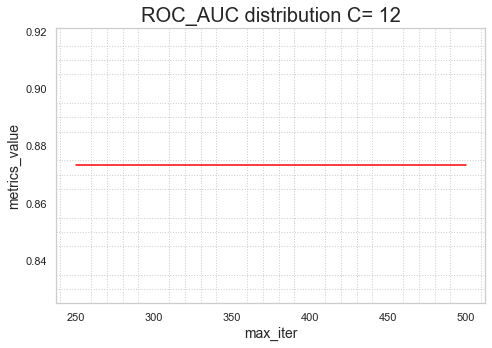

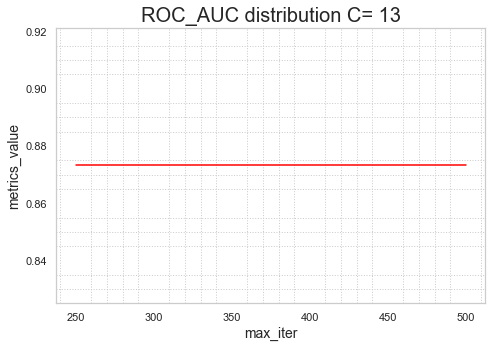

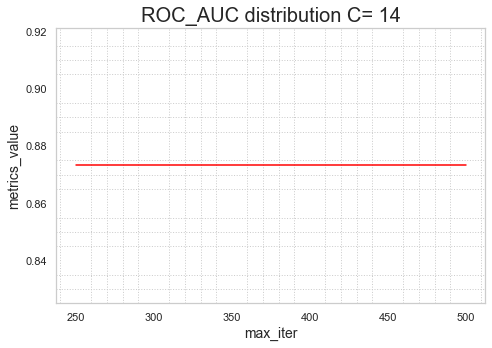

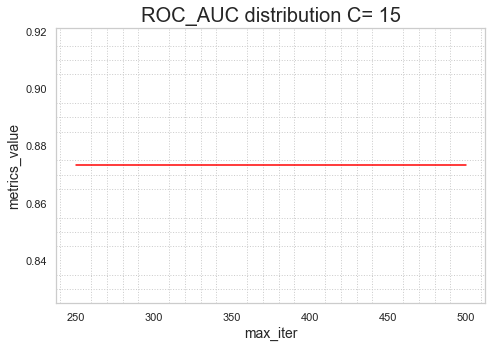

In [47]:
for i in grid_list_LR_2[1]['param_C'].unique():
    x=grid_list_LR_2[1][grid_list_LR_2[1]['param_C'] == i]['param_max_iter']
    y=grid_list_LR_2[1][grid_list_LR_2[1]['param_C'] == i]['mean_test_score']
    plt.figure(figsize=(7, 5))
    plt.plot(x, y, color='red', label='ROC_AUC')
    plt.xlabel('max_iter', fontsize=14)
    plt.ylabel('metrics_value', fontsize=14)
    plt.title('ROC_AUC distribution C= '+str(i), fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()

    plt.show()

In [48]:
best_LR_2 = LogisticRegression(
    C=grid_list_LR_2[0].best_params_['C'],
    random_state=42, max_iter=250, class_weight='balanced'
)

### 3.2 Выбор лучшей модели и проверка на тестовой выборке

Полученные результаты сведем в таблицу:

In [49]:
models_dict = {
                'balanced_class':['no','yes'],
                'DecisionTree_model':[grid_list_DTC_1[0].best_score_, grid_list_DTC_2[0].best_score_],
                'RandomForest_model':[grid_list_RFC_1[0].best_score_, grid_list_RFC_2[0].best_score_],
                'LogisticRegression_model':[grid_list_LR_1[0].best_score_, grid_list_LR_2[0].best_score_]
}
pd.DataFrame(data=models_dict, index=['ROC_AUC_1', 'ROC_AUC_2'])

,balanced_class,DecisionTree_model,RandomForest_model,LogisticRegression_model
ROC_AUC_1,no,0.833015,0.882967,0.874943
ROC_AUC_2,yes,0.828969,0.879881,0.875359


По полученным данным выигрывает первая модель случайного леса. Проверим качество по всем метрикам на тестовой выборке:

In [50]:
best_RFC_1.fit(features_train, target_train)
print(classification_report(target_test, best_RFC_1.predict(features_test)))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       103
           1       0.84      0.92      0.88       127

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230



Матрица ошибок:

[[ 80  23]
 [ 10 117]]


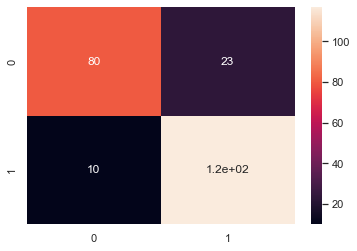

In [51]:
print(confusion_matrix(target_test,best_RFC_1.predict(features_test)))
sns.heatmap(confusion_matrix(target_test,best_RFC_1.predict(features_test)), annot=True);

ROC - кривая:

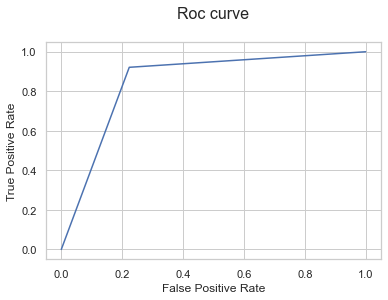

In [53]:
fpr, tpr, thresholds = roc_curve(target_test,best_RFC_1.predict(features_test))
plt.plot(fpr, tpr)
plt.title('Roc curve'+'\n', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


Площадь под кривой ROC - ROC_AUC:

In [54]:
print('ROC_AUC:')
print(roc_auc_score(target_test, best_RFC_1.predict_proba(features_test)[:,1]))

ROC_AUC:
0.8908722574726702


Наиболее значимые признаки:

In [56]:
features.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [57]:
features_name = ['Возраст',
                 'Артериальное давление',
                 'Уровень холестерина',
                 'Уровень сахара',
                 'Макс. частота серд. сокращений',
                'Стенокардия при физ. нагрузке',
                'Уменьшение ST',
                'Количество крупных сосудов',
                'Пол',
                'Тип боли - атипичная стенокардия',
                'Тип боли - не стенокардия',
                'Электрокардиограмма - в норме',
                'Электрокардиограмма - есть аномалия',
                'Наклон пика ST - плоский',
                 'Наклон пика ST - восходящий',
                 'Талласемия - в норме', 
                 'Талласемия - дефект',
                 'Талласемия - обратимый дефект'
                ]

In [58]:
important_features = pd.Series(best_RFC_1.feature_importances_, index = features_name).reset_index()
important_features.index = important_features['index']
important_features.rename(columns={0:'features'}, inplace=True)


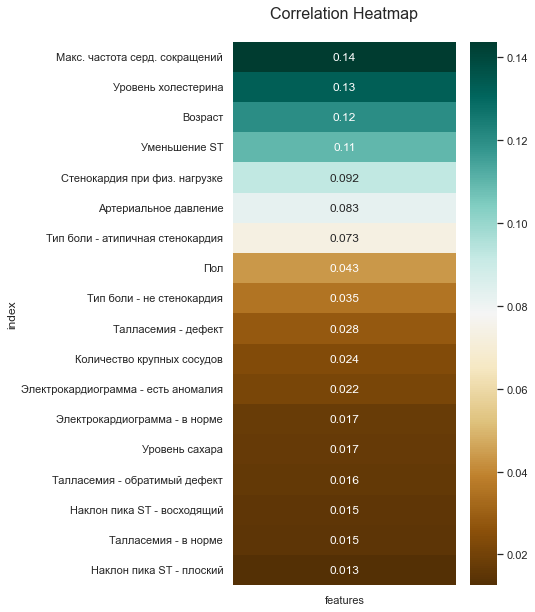

In [59]:
plt.figure(figsize=(5,10))
sns.heatmap(
    important_features[['features']].sort_values(
        by='features', ascending=False
    ), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap'+'\n', fontsize = 16);

## 4. Общий вывод

Задачей настоящего проекта является разработка модели машинного обучения для определения наличия сердечной болезни у пациента.


В качестве исходных данных получен датасет с информации о 920 различных пациентах, их анализах и праметрах, а так же с информацией о наличии той или иной стадии сердечного заболевания или их отсутсвия.

Проведени исследовательский анализ данных в результате которого выяснил:
* Есть пропущенные значени признаков, которые можно заменить на среднее или медиану. Метод describe показал;
* Есть значения уровня холестирина и артериального давления равные нулю, что так же необходимо поправить;
* Данные колонок с уникальным номером, а так же с местом сбора данных не информативны для построения модели - их можно удалить;
* Выявлена некоторая зависимость стадии заболевания от возраста, артериального давления.

Проведена прелобработка данных:
* Заменены пропуски;
* Удалены дубликаты;
* Стандартизированы данные.

Обучены и подбраны наилучшие гиперпараметры трех моделей:
* Дерево решений;
* Случайный лес;
* Логистическая регрессия.

Наилучшие результаты на тестовой выборке показала модель случайного леса:
* ROC_AUC - 0.89 - удовлетворительное значение;
* recall - 0,92 - а это значит, что ложноотрицательных ответов будет мало, что нам и нужно - пациенту, у которого есть бользнь модель в редких случаях поставит, что нет. В большинстве случаев модель правильно угадывает как раз пациентов с болезнью для назначения дальнейшего обследования;
* Основные признаки влияющие на приятие решения моделью предсавлны на графике выше.
